In [1]:
import openreview
import pandas as pd
import requests
import re
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
client = openreview.Client(baseurl = 'https://openreview.net', username = 'OpenReview.net')

In [4]:
invitations = [ i.id for i in client.get_invitations(regex = '.*/(Blind_|Full_)?[sS]ubmission$', expired = False)]
valid_invitations = set()
for i in invitations:
    if 'TEST.cc' not in i and 'Withdraw_Submission' not in i:
        venue = i.split('/-/')[0]
        if venue + '/-/Blind_Submission' in invitations:
            valid_invitations.add(venue + '/-/Blind_Submission')
        else:
            valid_invitations.add(i)

In [5]:
len(valid_invitations)

75

In [6]:
records = []
for i in valid_invitations:
    venue = i.split('/-/')[0]
    notes = list(openreview.tools.iterget_notes(client, invitation = i, details='replyCount'))
    if not notes:
        print('No submissions for: ' + i)
    for n in notes:
        cdate = datetime.fromtimestamp(n.tcdate / 1000)
        records.append([n.id, n.tcdate, cdate.year, cdate.month, cdate.day, i, venue, n.details['replyCount']])
df = pd.DataFrame.from_records(records, columns = ['id', 'cdate', 'cyear', 'cmonth', 'cday', 'invitation', 'venue', 'reply_count'])

No submissions for: adai.ai/DAI/2019/Conference/-/Submission
No submissions for: ICML.cc/2019/Workshop/AMTL/-/Submission
No submissions for: gamesec-conf.org/GameSec/2019/Conference/-/Submission
No submissions for: ICLR.cc/2013/-/submission
No submissions for: swsa.semanticweb.org/ISWC/2019/Workshop/DeSemWeb/-/Submission
No submissions for: ICML.cc/2019/Workshop/RL4RealLife/-/Submission
No submissions for: aclweb.org/NAACL/2018/Preprint/-/Blind_Submission
No submissions for: EMNLP/2019/Workshop/Summarization/-/Submission
No submissions for: ICLR.cc/2014/-/submission
No submissions for: icaps-conference.org/ICAPS/2019/Workshop/VRDIP/-/Submission
No submissions for: icaps-conference.org/ICAPS/2019/Workshop/XIAP/-/Submission
No submissions for: eswc-conferences.org/ESWC/2019/Workshop/KGB/-/Full_Submission
No submissions for: ICML.cc/2019/Workshop/Deep_Phenomena/-/Submission
No submissions for: ICLR.cc/2019/Workshops/DeepGenStruct/-/Blind_Submission


## Submission list

In [7]:
df[:5]

,id,cdate,cyear,cmonth,cday,invitation,venue,reply_count
0,H1Hp-q2s,1473188285457,2016,9,6,ECCV2016.org/BNMW/-/submission,ECCV2016.org/BNMW,2
1,H1q36jBj,1472736690691,2016,9,1,ECCV2016.org/BNMW/-/submission,ECCV2016.org/BNMW,1
2,SklVpqHi,1472732456334,2016,9,1,ECCV2016.org/BNMW/-/submission,ECCV2016.org/BNMW,4
3,Sy9g8Lrj,1472714226616,2016,9,1,ECCV2016.org/BNMW/-/submission,ECCV2016.org/BNMW,4
4,rkPOKkrj,1472686446908,2016,8,31,ECCV2016.org/BNMW/-/submission,ECCV2016.org/BNMW,3


### Count of submissions per venue

In [8]:
df.groupby(['venue']).count().sort_values(by=['id'], ascending = False)[['id']]

,id
venue,
ICLR.cc/2019/Conference,1419
ICLR.cc/2018/Conference,911
ICLR.cc/2017/conference,490
auai.org/UAI/2019/Conference,370
learningtheory.org/COLT/2019/Conference,356
ICLR.cc/2018/Workshop,343
auai.org/UAI/2018,336
auai.org/UAI/2017,284
ICLR.cc/2017/workshop,158


### Count of submissions per year

In [9]:
df_by_year = df.groupby(['cyear']).count().sort_values(by=['id'], ascending = False)[['id']]
df_by_year

,id
cyear,
2018,2757
2017,1462
2019,936
2016,640
2013,207
2014,1


### Total of submissions

In [10]:
df_by_year['id'].sum()

6003

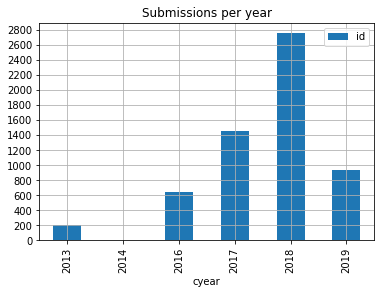

In [11]:
df_by_year.sort_values(by=['cyear']).plot.bar(title = 'Submissions per year', yticks = range(0, 3000, 200), grid = True)

### Count of venues per year

In [12]:
df_by_venue = df.groupby(['cyear']).agg({ 'venue': 'nunique'})
df_by_venue

,venue
cyear,
2013,6
2014,1
2016,5
2017,13
2018,22
2019,17


### Total of venues with submissions

In [13]:
df_by_venue.venue.sum()

64

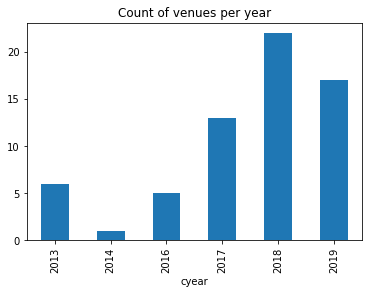

In [14]:
df_by_venue['venue'].plot.bar(title = 'Count of venues per year')

## Profiles

In [15]:
#### profiles
profiles = [{ "year" : "2017", "all" : 7447, "active" : 4601 },
{ "year" : "2019", "all" : 15620, "active" : 1490 },
{ "year" : "2018", "all" : 8464, "active" : 6400 },
{ "year" : "2016", "all" : 1773, "active" : 1748 }]

In [16]:
profiles_df = pd.DataFrame.from_dict(profiles).sort_values(by=['year'])
profiles_df.index = profiles_df["year"]
del profiles_df["year"]

### Count of created profiles per year

In [17]:
profiles_df

,active,all
year,,
2016,1748,1773
2017,4601,7447
2018,6400,8464
2019,1490,15620


### Total of active profiles

In [18]:
profiles_df['active'].sum()

14239

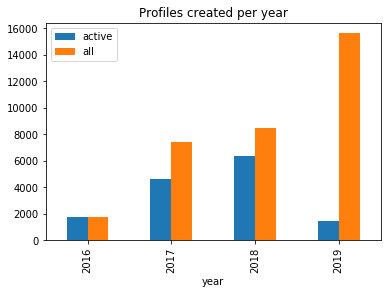

In [19]:
profiles_df.plot(kind = 'bar', title = 'Profiles created per year')

## Forum replies

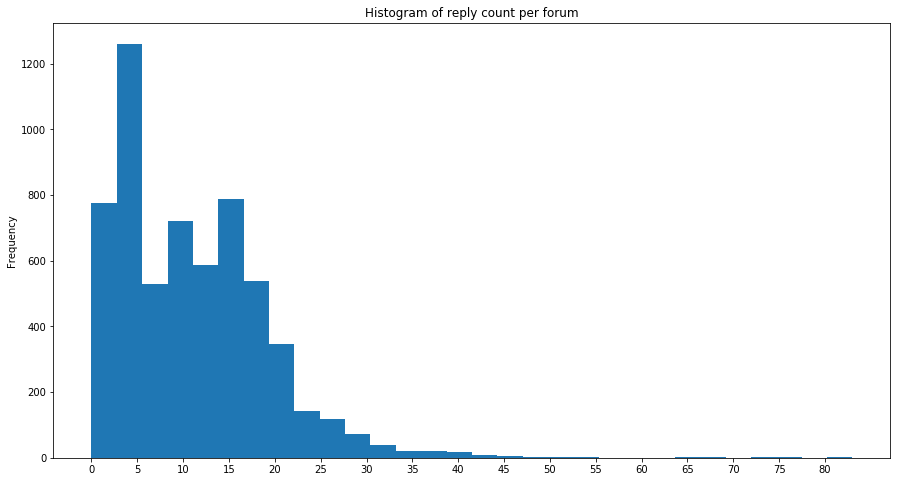

In [20]:
ax = df['reply_count'].plot(kind='hist', figsize=(15,8), bins = 30, title = 'Histogram of reply count per forum')
plt.xticks(range(0, 85, 5))
plt.show()

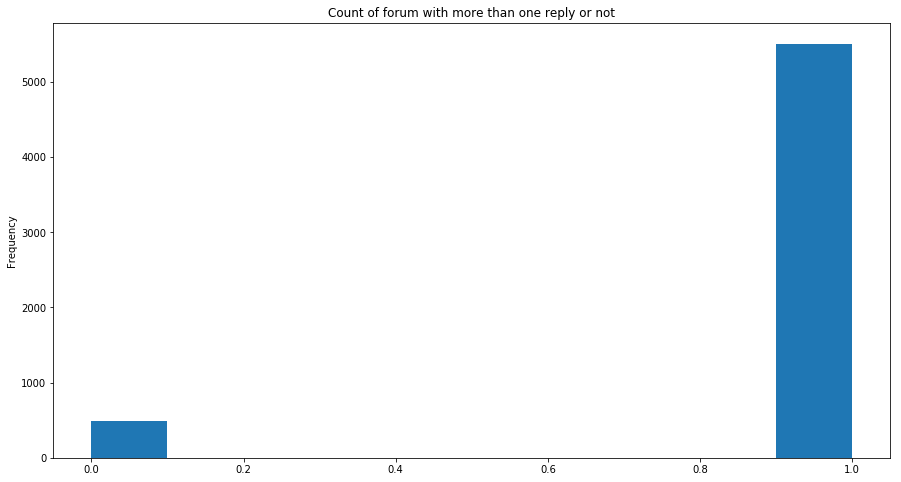

In [21]:
(df['reply_count'] > 0).astype(int).plot(kind='hist', figsize=(15,8), title = 'Count of forum with more than one reply or not')

In [22]:
comments = list(openreview.tools.iterget_notes(client, invitation = '.*([cC]omment|[rR]eview)$'))

In [23]:
comments_array = []
for c in comments:
    comments_array.append([c.id, c.forum, c.tcdate, datetime.fromtimestamp(c.tcdate / 1000)])

### List of comments and reviews 

In [24]:
comments_df = pd.DataFrame.from_records(comments_array, columns = ['id', 'forum', 'tcdate', 'date'])
comments_df[:5]

,id,forum,tcdate,date
0,HJgbO3PKFV,SyxjRu3mNE,1554771048725,2019-04-08 20:50:48.725
1,BkghocPtK4,BJeC5d2X4N,1554770596003,2019-04-08 20:43:16.003
2,ByeiU9vFYE,BJeC5d2X4N,1554770515076,2019-04-08 20:41:55.076
3,Syl_ZUDtKV,r1eDc_27EE,1554769407627,2019-04-08 20:23:27.627
4,S1eA24wKt4,BJeC5d2X4N,1554769078410,2019-04-08 20:17:58.410


### Ranking of comments/reviews per month/year

In [25]:
group_by_date_df = comments_df.groupby([comments_df.date.dt.year, comments_df.date.dt.month]).count()
del group_by_date_df['forum']
del group_by_date_df['tcdate']
del group_by_date_df['date']
group_by_date_df.rename(index=str, columns={"id": "count"}, inplace = True)
group_by_date_df.sort_values(by=['count'], ascending = False)[:10]

count
date date       
2018 11    15188
     1      4196
     12     4181
2016 12     3865
2017 11     3431
     12     2912
     5      2892
2018 10     2710
2017 1      2330
2018 4      2114

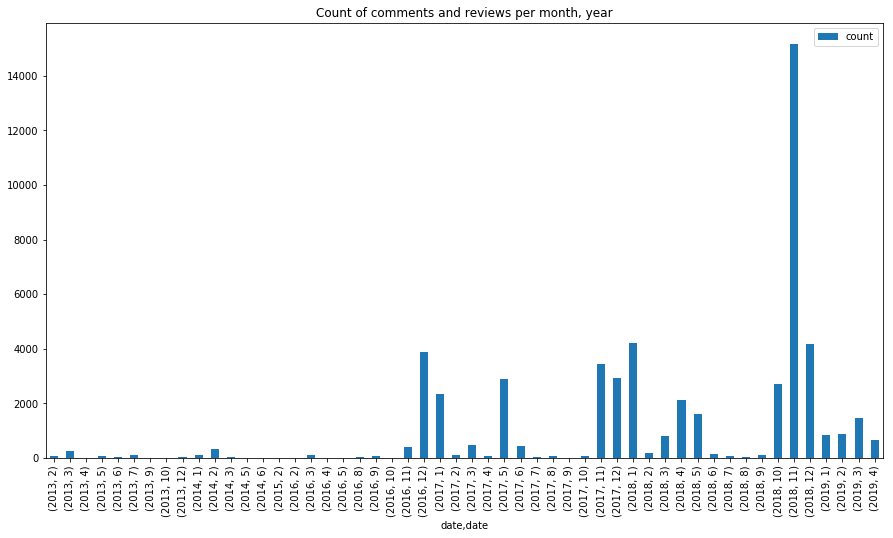

In [26]:
group_by_date_df.plot(figsize=(15,8), kind = 'bar', title = 'Count of comments and reviews per month, year')

## ICLR Submissions

In [27]:
notes = list(openreview.tools.iterget_notes(client, invitation = 'ICLR.cc/201.*/[cC]onference/-/(Withdrawn_)?[sS]ubmission', trash = True))
records = []
for n in notes:
    cdate = datetime.fromtimestamp(n.tcdate / 1000)
    venue = n.invitation.split('/-/')[0]
    records.append([n.id, n.tcdate, cdate, cdate.year, cdate.month, cdate.day, venue])
iclr_df = pd.DataFrame.from_records(records, columns = ['id', 'cdate', 'date', 'cyear', 'cmonth', 'cday', 'venue'])

### Total of ICLR conference submissions

In [28]:
len(iclr_df)

3831

In [29]:
iclr_df.groupby('cyear').id.count()

cyear
2013     135
2014       1
2016     611
2017    1216
2018    1868
Name: id, dtype: int64

### Distribution of ICLR 2019 submissions per day

In [30]:
iclr_df[iclr_df['venue'] == 'ICLR.cc/2019/Conference'].groupby([iclr_df.date.dt.day]).id.count()

date
13       2
14      12
15       5
16       5
17       6
18       9
19      13
20      12
21      15
22      15
23      16
24      37
25      76
26     213
27    1384
Name: id, dtype: int64

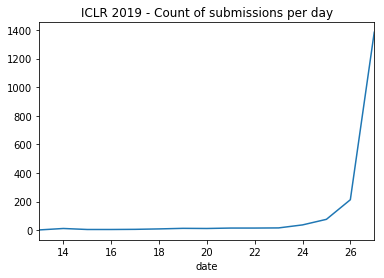

In [31]:
iclr_df[iclr_df['venue'] == 'ICLR.cc/2019/Conference'].groupby([iclr_df.date.dt.day]).id.count().plot(title = 'ICLR 2019 - Count of submissions per day')

### Distribution of ICLR 2019 submissions by hour during the last the day of the submissions

In [32]:
last_iclr_2019 = iclr_df[iclr_df['cday'] == 27]
last_iclr_2019 = last_iclr_2019[last_iclr_2019['venue'] == 'ICLR.cc/2019/Conference']
last_iclr_2019 = last_iclr_2019.groupby([last_iclr_2019.date.dt.hour]).id.count()
last_iclr_2019

date
0      18
1      21
2      22
3      24
4      16
5      19
6      21
7      20
8      28
9      25
10     52
11     55
12     57
13     85
14     91
15    110
16    171
17    369
18    180
Name: id, dtype: int64

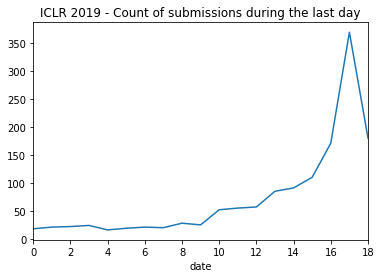

In [33]:
last_iclr_2019.plot(title = 'ICLR 2019 - Count of submissions during the last day')

### Distribution of ICLR 2018 submissions per day

In [34]:
iclr_df[iclr_df['venue'] == 'ICLR.cc/2018/Conference'].groupby([iclr_df.date.dt.day]).id.count()

date
1       4
2       8
3       7
4       5
5       6
7       3
9       4
10      3
11      5
12      4
13      4
14      3
15      3
16      1
17      4
18      6
19      9
20     13
21      5
22      9
23     15
24     22
25     33
26    126
27    944
28      7
29      6
30      2
31      3
Name: id, dtype: int64

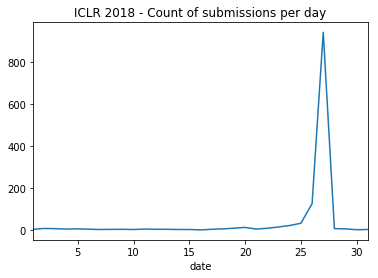

In [35]:
iclr_df[iclr_df['venue'] == 'ICLR.cc/2018/Conference'].groupby([iclr_df.date.dt.day]).id.count().plot(title = 'ICLR 2018 - Count of submissions per day')

### Distribution of ICLR 2018 submissions by hour during the last the day of the submissions

In [36]:
last_iclr_2018 = iclr_df[iclr_df['cday'] == 27]
last_iclr_2018 = last_iclr_2018[last_iclr_2018['venue'] == 'ICLR.cc/2018/Conference']
last_iclr_2018 = last_iclr_2018.groupby([last_iclr_2018.date.dt.hour]).id.count()
last_iclr_2018

date
0      12
1      17
2      13
3      18
4      16
5      26
6      12
7      17
8      13
9      25
10     21
11     32
12     27
13     94
14     83
15    110
16    295
17    107
18      6
Name: id, dtype: int64

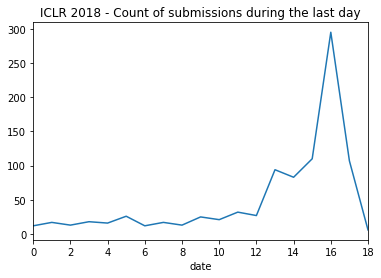

In [37]:
last_iclr_2018.plot(title = 'ICLR 2018 - Count of submissions during the last day')

### Distribution of ICLR 2017 submissions by hour during the last the day of the submissions

In [38]:
iclr_df[iclr_df['venue'] == 'ICLR.cc/2017/conference'].groupby([iclr_df.date.dt.month, iclr_df.date.dt.day]).id.count()

date  date
10    16        1
      17        1
      18        2
      19        1
      21        1
      25        1
      27        1
      28        1
      29        3
      30        3
      31       12
11    1        13
      2        15
      3        56
      4       435
      5        65
Name: id, dtype: int64

In [39]:
last_iclr_2017 = iclr_df[iclr_df['cday'] == 4]
last_iclr_2017 = last_iclr_2017[last_iclr_2017['venue'] == 'ICLR.cc/2017/conference']
last_iclr_2017 = last_iclr_2017.groupby([last_iclr_2017.date.dt.hour]).id.count()
last_iclr_2017

date
0      5
1      7
2     11
3     12
4      4
5      5
6      6
7      2
8      6
9      2
10    18
11    13
12    25
13    42
14    47
15    92
16    49
17    21
18    52
19     4
20     1
21     5
22     4
23     2
Name: id, dtype: int64

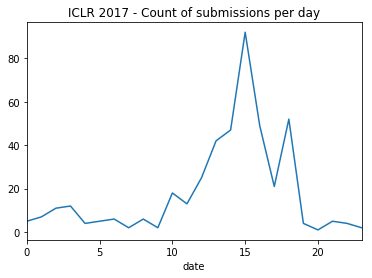

In [40]:
last_iclr_2017.plot(title = 'ICLR 2017 - Count of submissions per day')

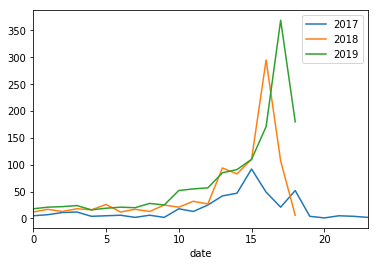

In [41]:
last_iclr_2017.plot(label = '2017', legend = True)
last_iclr_2018.plot(label = '2018', legend = True)
last_iclr_2019.plot(label = '2019', legend = True)